In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.Symbol('x')
y = sym.Symbol('y')

In [3]:
def f(x, y):
    return x**4+2*y**4-3*y**2-x-y/10

In [4]:
func = f(x, y)
func

x**4 - x + 2*y**4 - 3*y**2 - y/10

In [5]:
def grad(func, vector):
    
    dx = sym.diff(func, x)
    dy = sym.diff(func, y)
    
    return np.array([
        dx.subs([
            (x, vector[0]),
            (y, vector[1])
        ]), 
        dy.subs([
            (x, vector[0]),
            (y, vector[1])
        ])
    ], dtype='float64')

In [6]:
def dynamic_lr(func, start_point, learning_rate=0.01, initial_learning_rate=0.1, decay=0.01, iterations=10, epsilon=1e-10):
    
    vector = np.array(start_point, dtype='float64')
        
    res = []
    res.append(vector)
    
    for epoch in range(iterations):
        g = grad(func, vector)
        
        diff = -learning_rate * g
        
        if np.linalg.norm(g) <= epsilon:
            break

        learning_rate = initial_learning_rate * (1/(1 + decay * epoch))
        
        vector = vector + diff
        res.append(vector)

    return np.array(res)

In [7]:
def adagrad(func, start_point, learning_rate=0.01, iterations=10, epsilon=1e-10):
    
    vector = np.array(start_point, dtype='float64')
    
    res = []
    res.append(vector)
    
    G = np.zeros(np.shape(vector)[0])
    
    for epoch in range(iterations):
        g = grad(func, vector)
        
        G = G + g**2
        
        diff = (-learning_rate / np.sqrt(G + epsilon)) * g
        
        if np.linalg.norm(g) <= epsilon:
            break

        vector = vector + diff
        res.append(vector)
        
    return np.array(res)

In [8]:
def impulse(func, start_point, learning_rate=0.01, gamma=0.9, iterations=10, epsilon=1e-10):
    
    vector = np.array(start_point, dtype='float64')
    
    velocity = 0
    
    res = []
    res.append(vector)
    
    for epoch in range(iterations):
        g = grad(func, vector)
        
        velocity = gamma * velocity - learning_rate * g
        
        if np.linalg.norm(g) <= epsilon:
            break

        vector = vector + velocity
        res.append(vector)
        
    return np.array(res)

In [9]:
def plot(res):
    fig=plt.figure(figsize=(15,8))

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    X = np.arange(-1.5, 1.5, 0.05)
    Y = np.arange(-1.5, 1.5, 0.05)

    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    ax1.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=10, antialiased=False, alpha=0.3)
    ax2.contourf(X, Y, Z, 20, cmap='coolwarm');

    X = np.concatenate(res[:, [0]])
    Y = np.concatenate(res[:, [1]])
    Z = f(X, Y)

    ax1.plot(X, Y, Z, color='r', marker='o', markersize=7, markeredgecolor='k')

    ax2.plot(X, Y, color='r', marker='o', markersize=4, markeredgecolor='k')


    ax1.view_init(40, -20)

    plt.show()

# Adagrad

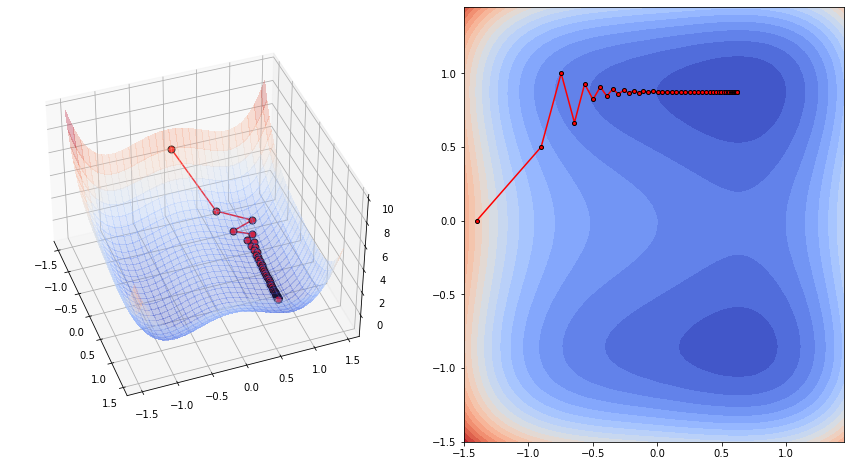

In [10]:
res = adagrad(func, [-1.4, 0.0], iterations=50, learning_rate=0.5)
plot(res)

# Dynamic LR

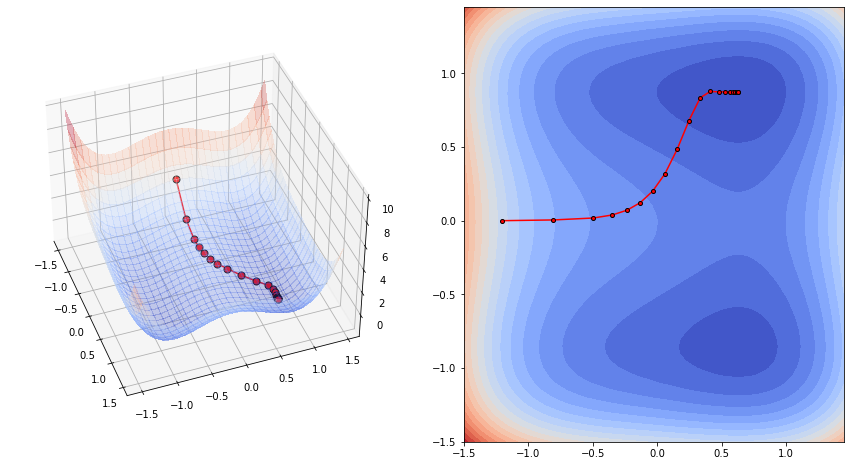

In [11]:
res = dynamic_lr(func, [-1.2, 0.0], iterations=20, learning_rate=0.05)
plot(res)

# Impulse

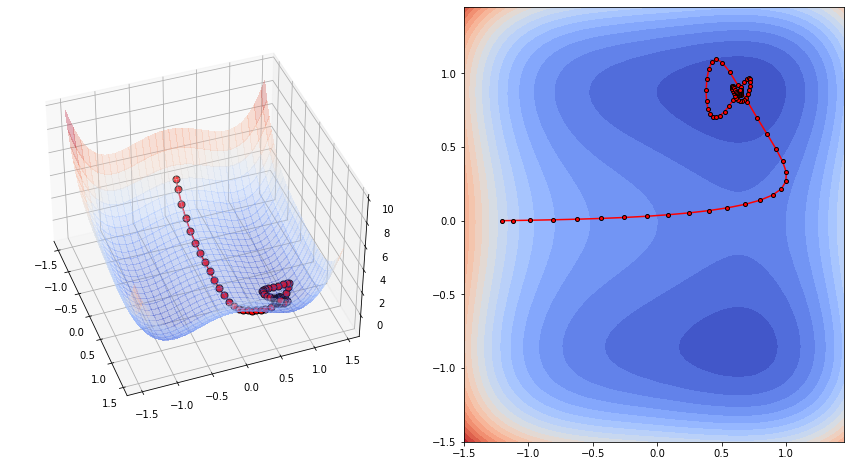

In [12]:
res = impulse(func, [-1.2, 0.0], iterations=80, learning_rate=0.01)
plot(res)